In [1]:
import os
import re
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from utils import *

pd.set_option('display.max_rows', 100)
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# File loading
df = pd.read_excel(r'..\..\Data\Targets.xlsx', 'Sheet1')
df.name = 'Targets'

In [3]:
# Dataframe head
df.head()

,Month,Region Sales Rep,Region Geography,Target
0,Jan 2018,Abdelkader Drouiche,France,57846.307737
1,Jan 2018,Agent Ouest,France,26729.430000
2,Jan 2018,Alexandra Van Oost,Germany,9083.938816
3,Jan 2018,Allenco Med,South Africa,65317.990000
4,Jan 2018,Andrew Elliott,UK,44826.225888


In [4]:
# Dataframe shape
df_shape = df.shape
print("This dataframe has %d columns and %d rows." % (df_shape[1], df_shape[0]))

This dataframe has 4 columns and 1696 rows.


In [5]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             1696 non-null   object 
 1   Region Sales Rep  1696 non-null   object 
 2   Region Geography  1696 non-null   object 
 3   Target            1696 non-null   float64
dtypes: float64(1), object(3)
memory usage: 53.1+ KB


<Figure size 432x288 with 0 Axes>

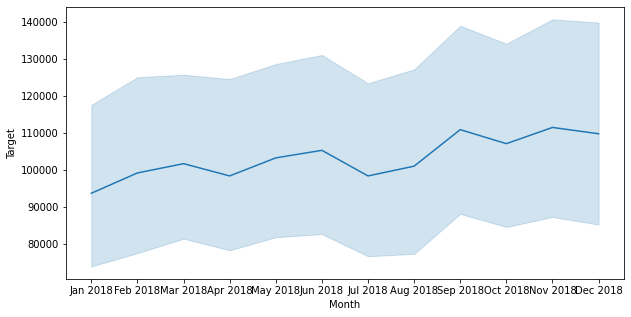

In [6]:
plot_by_date(df, 'Month')

<AxesSubplot:>

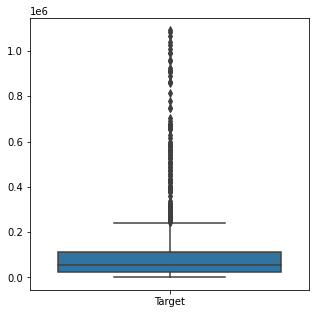

In [7]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df)

In [8]:
# Categorical features modalities
modalities_table(df)

,Modalities
Month,12
Region Geography,31
Region Sales Rep,91


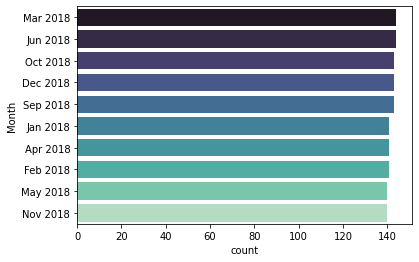

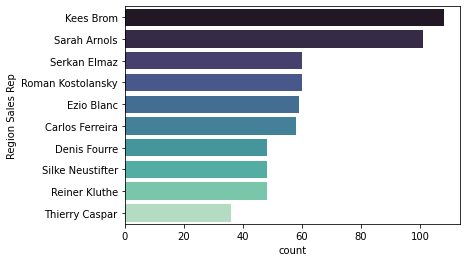

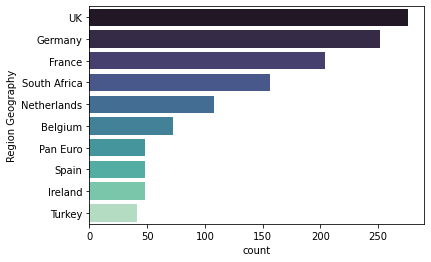

In [9]:
# Distribution of categorical columns        
plot_cat_dist(df)

In [10]:
# Replacing missing values with None
df.replace({'-': None},inplace=True)
df[df.isnull().any(axis=1)]

,Month,Region Sales Rep,Region Geography,Target


In [11]:
# Missing value summary
missing_values_table(df)

Your selected dataframe has 4 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [12]:
# Categorical features modalities
modalities_table(df, True)

,Modalities
Month,12
Region Geography,31
Region Sales Rep,91


In [13]:
months = set(df['Month'])
df_month = pd.DataFrame(months, columns=['Month'])
df_month

,Month
0,Oct 2018
1,Feb 2018
2,Jan 2018
3,Apr 2018
4,Dec 2018
5,Aug 2018
6,Jun 2018
7,Mar 2018
8,Sep 2018
9,Jul 2018


In [14]:
countries = sorted(list(set(df['Region Geography'])))
df_countries = pd.DataFrame(countries, columns=['Region Geography'])
df_countries

,Region Geography
0,Africa Other
1,Alternate Care
2,Austria
3,Belgium
4,CE Other
5,CIS
6,Cyprus
7,Czech Republic
8,EE Other
9,France


**UK** should be changed to **United Kingdom** to be joined with other tables.

In [15]:
df_expl = df_countries.iloc[[1,4,5,8,17,19,23,29]]
df_expl

,Region Geography
1,Alternate Care
4,CE Other
5,CIS
8,EE Other
17,Nordic
19,Pan Euro
23,Saudi & Other
29,UAE & Other


In [16]:
salesrep = sorted(list(set(df['Region Sales Rep'])))
df_salesrep = pd.DataFrame(salesrep, columns=['Region Sales Rep'])
df_salesrep

,Region Sales Rep
0,Abdelkader Drouiche
1,Agent Ouest
2,Alexandra Van Oost
3,Allenco Med
4,Andrew Elliott
5,Anke Hermsen
6,Anna Crossman
7,Anne-Marie Radermacher
8,Arjen Neggers
9,Asif Khan


In [17]:
df_expl = df_salesrep.iloc[[1, 21,50,54,55,56,57,73,74,87,88]]
df_expl

,Region Sales Rep
1,Agent Ouest
21,Community
50,NSM S&IP UK
54,OpRHFR01
55,OpenDE04
56,OpenSIPDE01
57,OpenSIPDE02
73,Sekhu L (NW)
74,Serkan Elmaz
87,Van der Merwe


In [18]:
a = max(df['Target'].astype(str).str.split('.').str[0].str.len())
b = max(df['Target'].astype(str).str.split('.').str[1].str.len())
print('Target decimal(%d, %d),' % 
      (a+b, b))

Target decimal(21, 14),


In [19]:
max(df['Target'].astype(str).str.split('.').str[0].str.len())

7

## The customer dimension should be in this schema :
<br/>
[ID] [int] IDENTITY(1,1) NOT NULL,<br/>
[customer_ID] [int] NOT NULL,<br/>
[customer_name] [varchar](40) NOT NULL,<br/>
[C01] [varchar](17) NULL,<br/>
[C02] [varchar](14) NULL,<br/>
[C03] [varchar](16) NULL,<br/>
[C04] [varchar](31) NULL,<br/>
[C05] [varchar](35) NULL,<br/>
[C06] [varchar](35) NULL,<br/>
[C07] [varchar](35) NULL,<br/>
[country_ID] [int] NOT NULL ##VARCHAR(25)